Thêm các thư viện cần thiết cho bài toán


In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import random as rd
from sklearn.metrics import mean_squared_error, r2_score

Phân tích thống kê trên dữ liệu

In [2]:
# load the data
parkinsons_data = pd.read_csv('/content/drive/MyDrive/machinelearning/parkinsons.data')

In [3]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#check col and row
parkinsons_data.shape

(195, 24)

In [5]:
# getting information
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# checking for missing values
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [9]:
# grouping the data based on the target variable
parkinsons_data.groupby('status').mean()

<ipython-input-9-18cc9e82c57e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parkinsons_data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Tiền xử lý dữ liệu

> Chuẩn bị dữ liệu



In [10]:
feature_names = parkinsons_data.drop(columns=['name', 'status']).columns.tolist()
print("Feature Names:")
print(feature_names)

Feature Names:
['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


In [11]:
# feature selection
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [12]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [13]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Chia tập dữ liệu vào tập train và test

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Chuẩn hóa dữ liệu

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

Các mô hình huấn luyện và đánh giá từng mô hình

XGBoost model


In [18]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, Y_train)
xgb_predicted = xgb.predict(X_test)

Sử dụng xgb model để đánh giá độ quan trọng của các feature

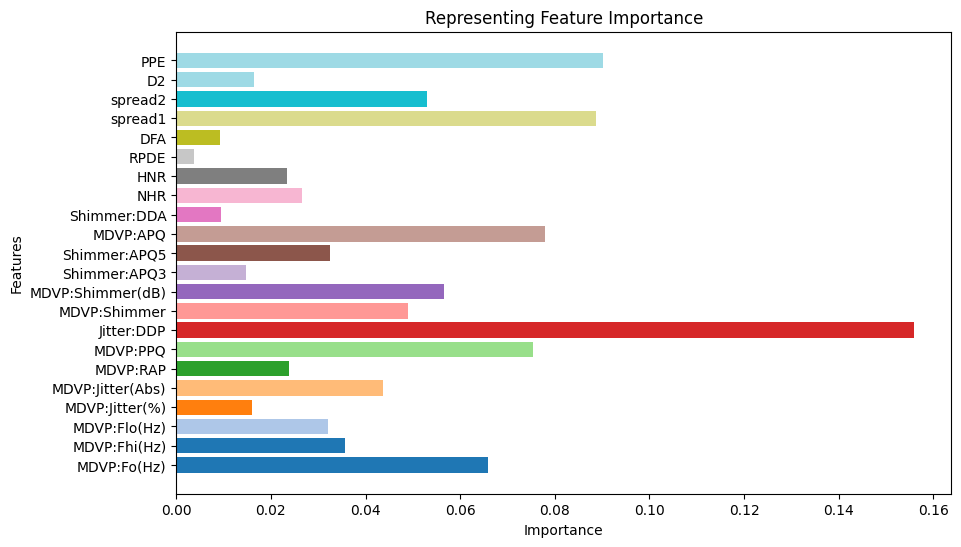

In [19]:
# list features
feature_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

# features importance
imp_feature = pd.DataFrame({'Feature': feature_names, 'Importance': xgb.feature_importances_})

# color
colors = plt.cm.tab20(np.linspace(0, 1, len(feature_names)))

# visual chart about importance of features using xgb model
plt.figure(figsize=(10, 6))
plt.title("Representing Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")

for i, (feature, color) in enumerate(zip(imp_feature['Feature'], colors)):
    plt.barh(feature, imp_feature.loc[i, 'Importance'], color=color)

plt.show()

Evaluation for classification

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Create a kNN classifier
knn = KNeighborsClassifier(n_neighbors=10)


knn.fit(X_train, Y_train)

# Predict on the training set
train_predictions = knn.predict(X_train)

# Evaluate performance on the training set
train_accuracy_kNN = accuracy_score(Y_train, train_predictions)
print("Training Set Accuracy:", train_accuracy_kNN)

# Predict on the test set
test_predictions = knn.predict(X_test)

# Evaluate performance on the test set
test_accuracy_kNN = accuracy_score(Y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy_kNN)

# Classification report for test set
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions))


Training Set Accuracy: 0.9423076923076923
Test Set Accuracy: 0.8717948717948718

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.96      0.87      0.92        31

    accuracy                           0.87        39
   macro avg       0.80      0.87      0.83        39
weighted avg       0.90      0.87      0.88        39



In [50]:
from sklearn.model_selection import GridSearchCV

# Tìm giá trị k tốt nhất
param_grid = {'n_neighbors': np.arange(1, 22)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, Y_train)

# In ra giá trị k tốt nhất
print("Best k:", knn_cv.best_params_['n_neighbors'])

Best k: 1


In [49]:
knn_overfitting = KNeighborsClassifier(n_neighbors=15)


knn_overfitting.fit(X_train, Y_train)

# Predict on the training set
train_predictions = knn_overfitting.predict(X_train)

# Evaluate performance on the training set
train_accuracy_kNN = accuracy_score(Y_train, train_predictions)
print("Training Set Accuracy:", train_accuracy_kNN)

# Predict on the test set
test_predictions = knn_overfitting.predict(X_test)

# Evaluate performance on the test set
test_accuracy_kNN = accuracy_score(Y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy_kNN)

# Classification report for test set
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions))

Training Set Accuracy: 0.8717948717948718
Test Set Accuracy: 0.8205128205128205

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.88      0.90      0.89        31

    accuracy                           0.82        39
   macro avg       0.72      0.70      0.71        39
weighted avg       0.81      0.82      0.82        39



In [21]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logistic_reg = LogisticRegression()

# Train the model on the training data
logistic_reg.fit(X_train, Y_train)

# Predict on the training set
train_predictions = logistic_reg.predict(X_train)

# Evaluate performance on the training set
train_accuracy_lr = accuracy_score(Y_train, train_predictions)
print("Training Set Accuracy:", train_accuracy_lr)

# Predict on the test set
test_predictions = logistic_reg.predict(X_test)

# Evaluate performance on the test set
test_accuracy_lr = accuracy_score(Y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy_lr)

# Classification report for test set
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions))

Training Set Accuracy: 0.8717948717948718
Test Set Accuracy: 0.8205128205128205

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



In [22]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the model on the training data
naive_bayes.fit(X_train, Y_train)

# Predict on the training set
train_predictions = naive_bayes.predict(X_train)

# Evaluate performance on the training set
train_accuracy_nb = accuracy_score(Y_train, train_predictions)
print("Training Set Accuracy:", train_accuracy_nb)

# Predict on the test set
test_predictions = naive_bayes.predict(X_test)

# Evaluate performance on the test set
test_accuracy_nb = accuracy_score(Y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy_nb)

# Classification report for test set
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions))


Training Set Accuracy: 0.7243589743589743
Test Set Accuracy: 0.6153846153846154

Classification Report:
              precision    recall  f1-score   support

           0       0.35      1.00      0.52         8
           1       1.00      0.52      0.68        31

    accuracy                           0.62        39
   macro avg       0.67      0.76      0.60        39
weighted avg       0.87      0.62      0.65        39



In [23]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the model on the training data
decision_tree.fit(X_train, Y_train)

# Predict on the training set
train_predictions = decision_tree.predict(X_train)

# Evaluate performance on the training set
train_accuracy_dt = accuracy_score(Y_train, train_predictions)
print("Training Set Accuracy:", train_accuracy_dt)

# Predict on the test set
test_predictions = decision_tree.predict(X_test)

# Evaluate performance on the test set
test_accuracy_dt = accuracy_score(Y_test, test_predictions)
print("Test Set Accuracy:", test_accuracy_dt)

# Classification report for test set
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions))


Training Set Accuracy: 1.0
Test Set Accuracy: 0.7435897435897436

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.96      0.71      0.81        31

    accuracy                           0.74        39
   macro avg       0.70      0.79      0.70        39
weighted avg       0.85      0.74      0.77        39



Evaluation for regression

In [24]:
from sklearn.svm import SVR

# Create an SVR model
svm_regressor = SVR(kernel='rbf')  # You can use different kernels like 'linear', 'poly', etc.

# Train the model on the training data
svm_regressor.fit(X_train, Y_train)

# Predict on the training set
train_predictions = svm_regressor.predict(X_train)

# Evaluate performance on the training set
train_rmse_svr = mean_squared_error(Y_train, train_predictions, squared=False)
train_r2_svr = r2_score(Y_train, train_predictions)
print("Training Set RMSE:", train_rmse_svr)
print("Training Set R-squared:", train_r2_svr)

# Predict on the test set
test_predictions = svm_regressor.predict(X_test)

# Evaluate performance on the test set
test_rmse_svr = mean_squared_error(Y_test, test_predictions, squared=False)
test_r2_svr = r2_score(Y_test, test_predictions)
print("\nTest Set RMSE:", test_rmse_svr)
print("Test Set R-squared:", test_r2_svr)


Training Set RMSE: 0.22094211974258868
Training Set R-squared: 0.7439715371023246

Test Set RMSE: 0.31443119900170863
Test Set R-squared: 0.39364243985686764


In [25]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_regressor = LinearRegression()

# Train the model on the training data
linear_regressor.fit(X_train, Y_train)

# Predict on the training set
train_predictions = linear_regressor.predict(X_train)

# Evaluate performance on the training set
train_rmse_lir = mean_squared_error(Y_train, train_predictions, squared=False)
train_r2_lir = r2_score(Y_train, train_predictions)
print("Training Set RMSE:", train_rmse_lir)
print("Training Set R-squared:", train_r2_lir)

# Predict on the test set
test_predictions = linear_regressor.predict(X_test)

# Evaluate performance on the test set
test_rmse_lir = mean_squared_error(Y_test, test_predictions, squared=False)
test_r2_lir = r2_score(Y_test, test_predictions)
print("\nTest Set RMSE:", test_rmse_lir)
print("Test Set R-squared:", test_r2_lir)


Training Set RMSE: 0.2929078736208478
Training Set R-squared: 0.5500198996046874

Test Set RMSE: 0.3793886062341583
Test Set R-squared: 0.11723297654922549


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
random_forest_regressor = RandomForestRegressor(random_state=42)

# Train the model on the training data
random_forest_regressor.fit(X_train, Y_train)

# Predict on the training set
train_predictions = random_forest_regressor.predict(X_train)

# Evaluate performance on the training set
train_rmse_rr = mean_squared_error(Y_train, train_predictions, squared=False)
train_r2_rr = r2_score(Y_train, train_predictions)
print("Training Set RMSE:", train_rmse_rr)
print("Training Set R-squared:", train_r2_rr)

# Predict on the test set
test_predictions = random_forest_regressor.predict(X_test)

# Evaluate performance on the test set
test_rmse_rr = mean_squared_error(Y_test, test_predictions, squared=False)
test_r2_rr = r2_score(Y_test, test_predictions)
print("\nTest Set RMSE:", test_rmse_rr)
print("Test Set R-squared:", test_r2_rr)


Training Set RMSE: 0.10099504938362078
Training Set R-squared: 0.9465027586206897

Test Set RMSE: 0.3223034085756575
Test Set R-squared: 0.3629004032258064


In [27]:
# Create a DataFrame to display test accuracy scores for each model
test_accuracy_df = pd.DataFrame({
    'Model': ['kNN', 'Logistic Regression', 'GaussianNB', 'Decision Trees'],
    'Test Accuracy': [test_accuracy_kNN  * 100, test_accuracy_lr * 100, test_accuracy_nb * 100, test_accuracy_dt * 100]
})
test_accuracy_df

,Model,Test Accuracy
0,kNN,87.179487
1,Logistic Regression,82.051282
2,GaussianNB,61.538462
3,Decision Trees,74.358974


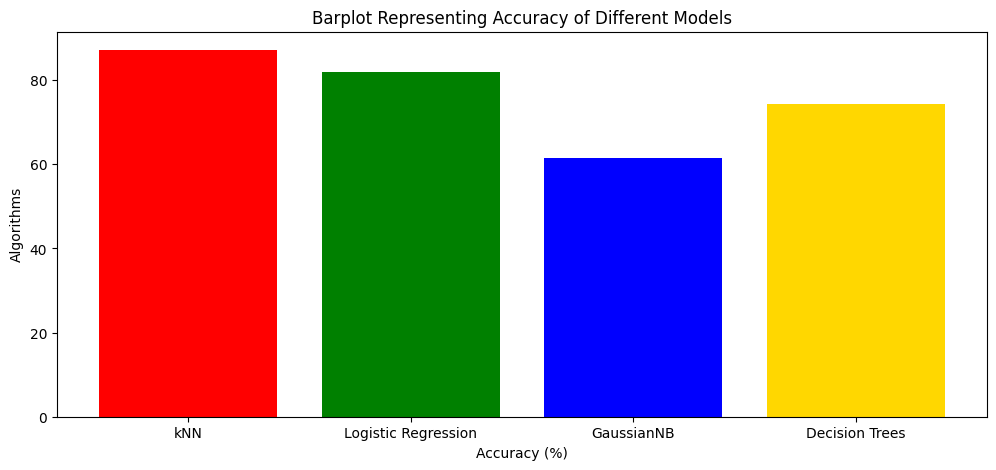

In [28]:
colors = ['red', 'green', 'blue', 'gold']  # Define colors for each model

plt.figure(figsize=(12, 5))
plt.title("Barplot Representing Accuracy of Different Models")
plt.xlabel("Accuracy (%)")
plt.ylabel("Algorithms")
plt.bar(test_accuracy_df['Model'], test_accuracy_df['Test Accuracy'], color=colors)
plt.show()

In [29]:
test_metrics_df = pd.DataFrame({
    'Model': ['SVR', 'Linear Regression', 'RandomForestRegressor'],
    'Mean Squared Error': [test_rmse_svr*100, test_rmse_lir*100, test_rmse_rr*100],
    'R2 Score': [test_r2_svr*100, test_r2_lir*100, test_r2_rr*100]
})
test_metrics_df

,Model,Mean Squared Error,R2 Score
0,SVR,31.443120,39.364244
1,Linear Regression,37.938861,11.723298
2,RandomForestRegressor,32.230341,36.290040


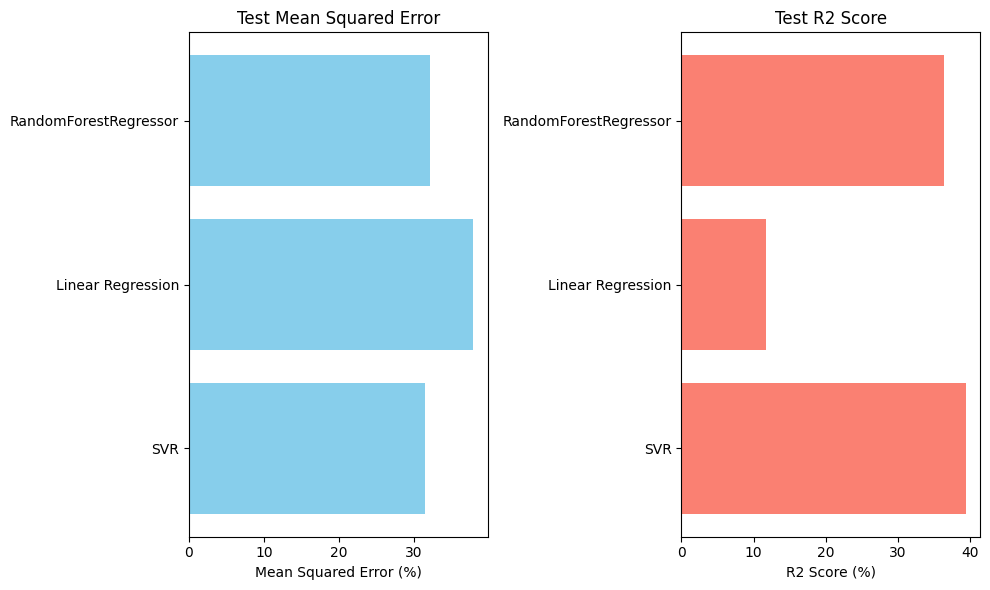

In [30]:
# Plotting Mean Squared Error and R2 Score
plt.figure(figsize=(10, 6))

# Mean Squared Error
plt.subplot(1, 2, 1)
plt.barh(test_metrics_df['Model'], test_metrics_df['Mean Squared Error'], color='skyblue')
plt.xlabel('Mean Squared Error (%)')
plt.title('Test Mean Squared Error')

# R2 Score
plt.subplot(1, 2, 2)
plt.barh(test_metrics_df['Model'], test_metrics_df['R2 Score'], color='salmon')
plt.xlabel('R2 Score (%)')
plt.title('Test R2 Score')

plt.tight_layout()
plt.show()

Deep Learning


In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam


 Feed Forward Neural Network

In [32]:
# Create a Sequential model
model_FFNN = Sequential()

# Add layers to the model
model_FFNN.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer with 64 neurons and ReLU activation
model_FFNN.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model_FFNN.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron (binary classification) and sigmoid activation

# Compile the model
model_FFNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_FFNN.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test), verbose=1)


Epoch 1/30
5/5 [==============================] - 2s 95ms/step - loss: 0.7309 - accuracy: 0.3846 - val_loss: 0.6600 - val_accuracy: 0.6410
Epoch 2/30
5/5 [==============================] - 0s 15ms/step - loss: 0.6036 - accuracy: 0.7179 - val_loss: 0.5967 - val_accuracy: 0.7692
Epoch 3/30
5/5 [==============================] - 0s 19ms/step - loss: 0.5280 - accuracy: 0.8077 - val_loss: 0.5489 - val_accuracy: 0.7949
Epoch 4/30
5/5 [==============================] - 0s 39ms/step - loss: 0.4763 - accuracy: 0.8205 - val_loss: 0.5105 - val_accuracy: 0.8205
Epoch 5/30
5/5 [==============================] - 0s 26ms/step - loss: 0.4376 - accuracy: 0.8205 - val_loss: 0.4795 - val_accuracy: 0.8462
Epoch 6/30
5/5 [==============================] - 0s 22ms/step - loss: 0.4058 - accuracy: 0.8333 - val_loss: 0.4540 - val_accuracy: 0.8462
Epoch 7/30
5/5 [==============================] - 0s 16ms/step - loss: 0.3799 - accuracy: 0.8462 - val_loss: 0.4322 - val_accuracy: 0.8462
Epoch 8/30
5/5 [===========

In [33]:
test_loss_FFNN, test_accuracy_FFNN = model_FFNN.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy_FFNN * 100:.2f}%")

2/2 [==============================] - 0s 11ms/step - loss: 0.3217 - accuracy: 0.7949
Test Accuracy: 79.49%


Reccurent Neural Network

In [34]:

# Reshape the data for LSTM (assuming X_train and X_test are 2D arrays)
X_train_RNN = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_RNN = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create a Sequential model
model_RNN = Sequential()

# Add an LSTM layer
model_RNN.add(LSTM(64, input_shape=(X_train_RNN.shape[1], X_train_RNN.shape[2])))

# Add a Dense output layer for binary classification
model_RNN.add(Dense(1, activation='sigmoid'))

# Compile the model
model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_RNN.fit(X_train_RNN, Y_train, epochs=30, batch_size=32, validation_data=(X_test_RNN, Y_test), verbose=1)


Epoch 1/30
5/5 [==============================] - 9s 279ms/step - loss: 0.6707 - accuracy: 0.6731 - val_loss: 0.6702 - val_accuracy: 0.5385
Epoch 2/30
5/5 [==============================] - 0s 35ms/step - loss: 0.6362 - accuracy: 0.6923 - val_loss: 0.6566 - val_accuracy: 0.5641
Epoch 3/30
5/5 [==============================] - 0s 36ms/step - loss: 0.6043 - accuracy: 0.7115 - val_loss: 0.6441 - val_accuracy: 0.5641
Epoch 4/30
5/5 [==============================] - 0s 21ms/step - loss: 0.5799 - accuracy: 0.7179 - val_loss: 0.6316 - val_accuracy: 0.5641
Epoch 5/30
5/5 [==============================] - 0s 31ms/step - loss: 0.5600 - accuracy: 0.7179 - val_loss: 0.6191 - val_accuracy: 0.5641
Epoch 6/30
5/5 [==============================] - 0s 21ms/step - loss: 0.5422 - accuracy: 0.7436 - val_loss: 0.6068 - val_accuracy: 0.5897
Epoch 7/30
5/5 [==============================] - 0s 23ms/step - loss: 0.5250 - accuracy: 0.7564 - val_loss: 0.5949 - val_accuracy: 0.6154
Epoch 8/30
5/5 [==========

In [35]:
test_loss_RNN, test_accuracy_RNN = model_RNN.evaluate(X_test_RNN, Y_test)
print(f"Test Accuracy: {test_accuracy_RNN * 100:.2f}%")

2/2 [==============================] - 0s 8ms/step - loss: 0.3951 - accuracy: 0.8205
Test Accuracy: 82.05%


 CNN model

In [36]:
# Reshape the data for 1D CNN (assuming X_train and X_test are 2D arrays)
X_train_CNN = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_CNN = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Create a Sequential model
model_CNN = Sequential()

# Add a 1D Convolutional layer
model_CNN.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_CNN.shape[1], X_train_CNN.shape[2])))

# Add a MaxPooling layer
model_CNN.add(MaxPooling1D(pool_size=2))

# Flatten the output before feeding to dense layers
model_CNN.add(Flatten())

# Add a Dense layer
model_CNN.add(Dense(64, activation='relu'))

# Add the output layer
model_CNN.add(Dense(1, activation='sigmoid'))

# Compile the model
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_CNN.fit(X_train_CNN, Y_train, epochs=30, batch_size=32, validation_data=(X_test_CNN, Y_test), verbose=1)


Epoch 1/30
5/5 [==============================] - 3s 126ms/step - loss: 0.6438 - accuracy: 0.6731 - val_loss: 0.5511 - val_accuracy: 0.7949
Epoch 2/30
5/5 [==============================] - 0s 24ms/step - loss: 0.4997 - accuracy: 0.7500 - val_loss: 0.4750 - val_accuracy: 0.7949
Epoch 3/30
5/5 [==============================] - 0s 23ms/step - loss: 0.4358 - accuracy: 0.7949 - val_loss: 0.4351 - val_accuracy: 0.8462
Epoch 4/30
5/5 [==============================] - 0s 61ms/step - loss: 0.3862 - accuracy: 0.8718 - val_loss: 0.4141 - val_accuracy: 0.8718
Epoch 5/30
5/5 [==============================] - 0s 48ms/step - loss: 0.3565 - accuracy: 0.8654 - val_loss: 0.4108 - val_accuracy: 0.8205
Epoch 6/30
5/5 [==============================] - 0s 49ms/step - loss: 0.3357 - accuracy: 0.8590 - val_loss: 0.3992 - val_accuracy: 0.8205
Epoch 7/30
5/5 [==============================] - 0s 42ms/step - loss: 0.3207 - accuracy: 0.8590 - val_loss: 0.3753 - val_accuracy: 0.8462
Epoch 8/30
5/5 [==========

In [37]:
test_loss_CNN, test_accuracy_CNN = model_CNN.evaluate(X_test_CNN, Y_test)
print(f"Test Accuracy: {test_accuracy_CNN * 100:.2f}%")

2/2 [==============================] - 0s 12ms/step - loss: 0.3444 - accuracy: 0.7692
Test Accuracy: 76.92%


In [38]:
# Create a DataFrame to display test accuracy scores for each model
test_accuracy_NN_df = pd.DataFrame({
    'Model': ['FFNN', 'RNN', 'CNN'],
    'Test Accuracy': [test_accuracy_FFNN  * 100, test_accuracy_RNN * 100, test_accuracy_CNN * 100]
})
test_accuracy_NN_df

,Model,Test Accuracy
0,FFNN,79.487181
1,RNN,82.051283
2,CNN,76.923078


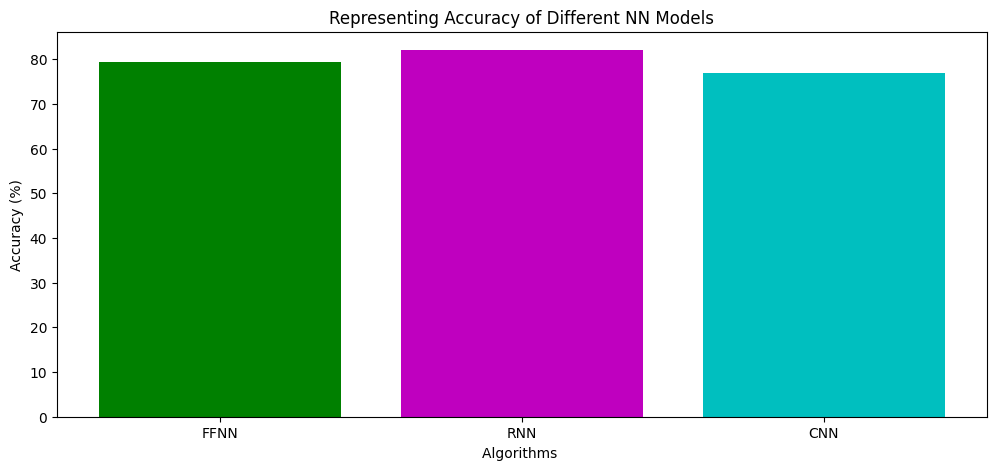

In [43]:
colors = ['g', 'm', 'c']  # Define colors for each model

plt.figure(figsize=(12, 5))
plt.title("Representing Accuracy of Different NN Models")
plt.xlabel("Algorithms ")
plt.ylabel("Accuracy (%)")
plt.bar(test_accuracy_NN_df['Model'], test_accuracy_NN_df['Test Accuracy'], color=colors)
plt.show()

In [40]:
#predict pakinson disease function:
def predict_parkinsons_status(features, model):
    # Convert the input features into a numpy array
    features_array = np.array(features).reshape(1, -1)  # Reshape into a 2D array

    # Scale the input features using the previously fitted scaler
    scaled_features = scaler.transform(features_array)

    # Predict the Parkinson's status using the trained SVM model
    prediction = model.predict(scaled_features)

    # Interpret the prediction (1 or 0) to represent status (1: Parkinson's, 0: Healthy)
    if prediction == 1:
        return "Parkinson's Disease Positive"
    else:
        return "Parkinson's Disease Negative"


In [ ]:
features_data = parkinsons_data.drop(columns=['name', 'status'])
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)
prediction_result = predict_parkinsons_status(input_data,model_CNN)
print("Prediction:", prediction_result)
# Determine the minimum and maximum values for each feature in the dataset
feature_ranges = {}
for column in features_data.columns:
    min_val = features_data[column].min()
    max_val = features_data[column].max()
    feature_ranges[column] = (min_val, max_val)

# Generate random values for all 22 features based on their ranges
num_sets = 50


for i in range(num_sets):
    random_input = [rd.uniform(feature_ranges[column][0], feature_ranges[column][1]) for column in features_data.columns]
    prediction_result = predict_parkinsons_status(random_input,model_CNN)
    print("Prediction:", prediction_result)